## Attributes information


maint     :   v-high, high, med, low

doors     :  2, 3, 4, 5-more

persons   : 2, 4, more

lug_boot  : small, med, big

buying    :  v-high, high, med, low

safety    :  low, med, high


class   :   N          N
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 



In [92]:
car_data = (r'C:\Users\DELL\Downloads\ai_nov21-main\ai_nov21\Chapter 2\06. Trees\car data.csv')

In [93]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [94]:
columns = ['buying','maint','doors','persons','lug_boot','safety','class']

In [95]:
df = pd.read_csv(car_data, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [96]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [97]:
len(df['class'].unique())

4

In [98]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [99]:
from sklearn.preprocessing import LabelEncoder

In [101]:
df1=df.apply(LabelEncoder().fit_transform)

In [102]:
X, y = df1.iloc[:, :-1], df1.iloc[:, -1]

In [103]:
X['maint'].unique()

array([3, 0, 2, 1])

In [104]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

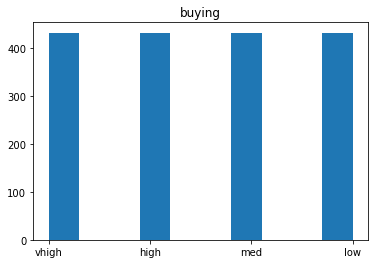

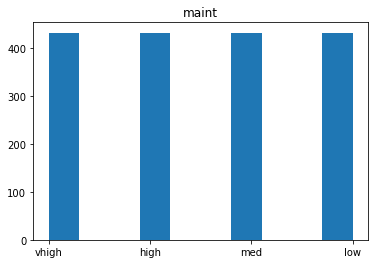

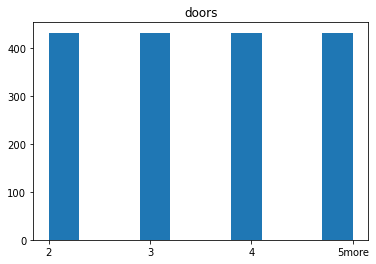

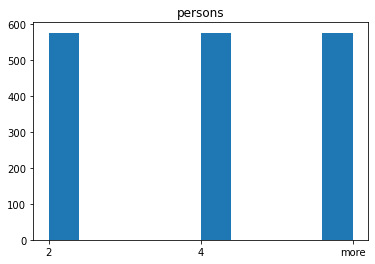

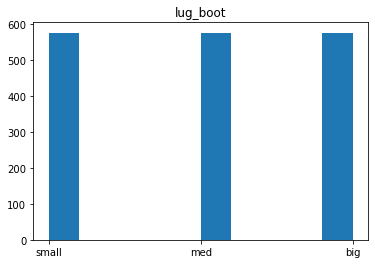

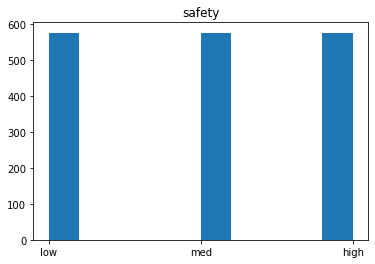

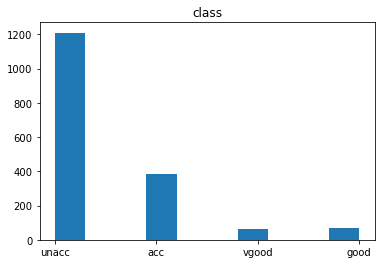

In [105]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [106]:
y.unique()

array([2, 0, 3, 1])

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [109]:
y_train.astype('int')

1178    3
585     2
1552    0
1169    2
1033    2
       ..
1130    3
1294    1
860     0
1459    2
1126    0
Name: class, Length: 1209, dtype: int32

In [110]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(453.7540760869565, 788.22, 'persons <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]\nclass = vgood'),
 Text(441.6236413043478, 733.86, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]\nclass = vgood'),
 Text(465.8845108695652, 733.86, 'safety <= 0.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]\nclass = vgood'),
 Text(250.19021739130434, 679.5, 'maint <= 2.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]\nclass = unacc'),
 Text(136.4673913043478, 625.14, 'buying <= 0.5\ngini = 0.613\nsamples = 202\nvalue = [114, 21, 26, 41]\nclass = unacc'),
 Text(36.391304347826086, 570.78, 'doors <= 0.5\ngini = 0.103\nsamples = 55\nvalue = [52, 0, 3, 0]\nclass = unacc'),
 Text(24.26086956521739, 516.42, 'lug_boot <= 1.5\ngini = 0.337\nsamples = 14\nvalue = [11, 0, 3, 0]\nclass = unacc'),
 Text(12.130434782608695, 462.06, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]\nclass = unacc'),
 Text(36.391304347826086, 462.06, 'persons <= 1.5\ngini = 0.48\nsamples 

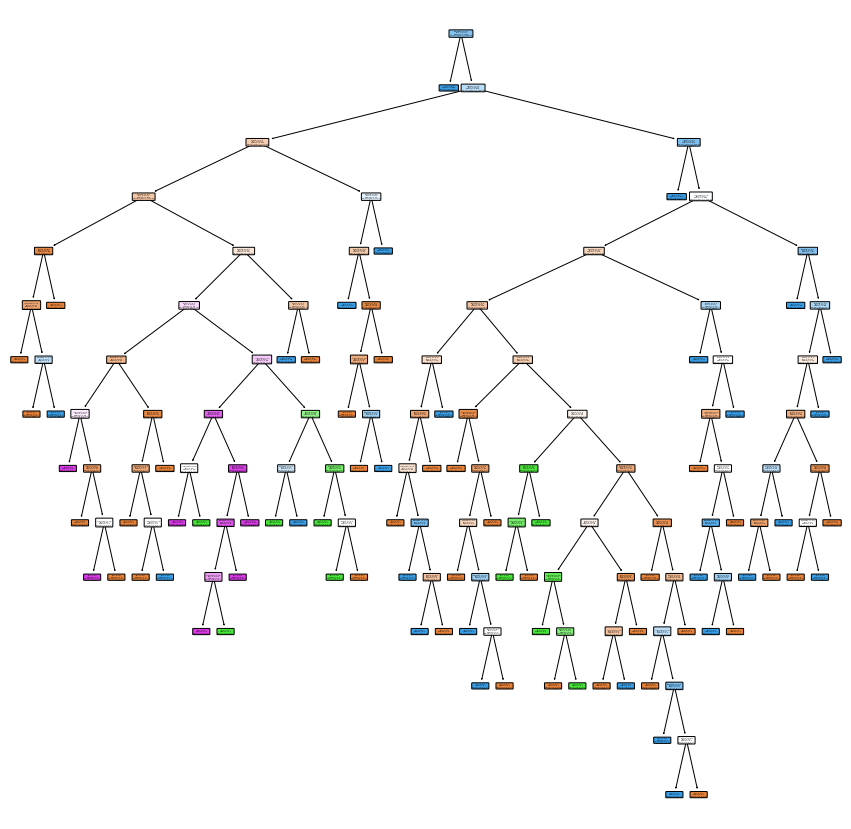

In [111]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'vgood', 'good'],
         feature_names=X.columns)

C:\Users\DELL\anaconda3\envs\vishwa\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


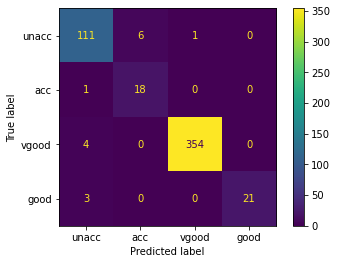

In [113]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['unacc', 'acc', 'vgood', 'good'])